In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
turbine_data=pd.read_excel('interview data.xlsx')

In [129]:
turbine_data.head()

,TimeStamp,GT1 Generator Watts Max Selected {Avg},GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 Compressor Inlet Temperature {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},GT1 Compressor Discharge Temperature {Avg}
0,2020-08-24 00:00:00,46.436666,1100.029649,104.321768,56.884733,113.176942,648.852809
1,2020-08-24 00:15:00,46.343993,1099.984785,104.454431,56.921203,112.983140,648.279097
2,2020-08-24 00:30:00,46.260622,1100.223210,104.217306,56.957673,112.964069,647.887172
3,2020-08-24 00:45:00,46.368425,1100.167993,104.080068,56.994142,113.070646,648.049427
4,2020-08-24 01:00:00,46.290432,1099.842908,103.864473,57.030612,113.042470,647.206482


In [130]:
turbine_data.columns=['TimeStamp','Generated watts','Exhaust temp','Comp Inlet Temp','Comp IGV angle','Comp discharge pressure','Comp discharge temp']


In [131]:
turbine_data.describe()

,Generated watts,Exhaust temp,Comp Inlet Temp,Comp IGV angle,Comp discharge pressure,Comp discharge temp
count,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000
mean,37.198114,624.547023,79.674343,56.289717,79.599056,400.330157
std,36.421137,467.832104,10.975498,24.042792,74.798557,269.464808
min,-0.033970,59.602717,44.567177,31.964838,-0.785665,62.466905
25%,-0.019440,81.175692,74.197544,32.032597,-0.002007,80.433695
50%,46.082923,1027.955506,79.530186,53.552446,112.050300,606.421915
75%,76.853076,1051.602964,84.896609,83.770569,157.515381,647.899412
max,83.619574,1100.391963,112.423642,83.998651,171.312171,701.815532


In [132]:
turbine_data.shape

(8260, 7)

In [133]:
turbine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TimeStamp                8260 non-null   datetime64[ns]
 1   Generated watts          8260 non-null   float64       
 2   Exhaust temp             8260 non-null   float64       
 3   Comp Inlet Temp          8260 non-null   float64       
 4   Comp IGV angle           8260 non-null   float64       
 5   Comp discharge pressure  8260 non-null   float64       
 6   Comp discharge temp      8260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 451.8 KB


In [134]:
# DATA PREPROCESSING

In [135]:
#Checking for null values
turbine_data.isnull().sum()

TimeStamp                  0
Generated watts            0
Exhaust temp               0
Comp Inlet Temp            0
Comp IGV angle             0
Comp discharge pressure    0
Comp discharge temp        0
dtype: int64

In [136]:
#checking if any feature is categorical
turbine_data.nunique()

TimeStamp                  8256
Generated watts            8260
Exhaust temp               8260
Comp Inlet Temp            8259
Comp IGV angle             8260
Comp discharge pressure    8258
Comp discharge temp        8260
dtype: int64

In [137]:
def outlier_boxplot(col):
    sns.boxplot(turbine_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


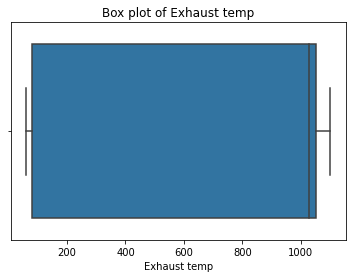

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


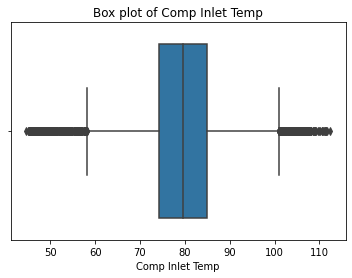

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


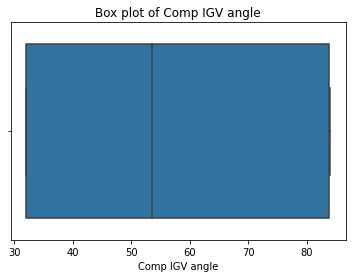

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


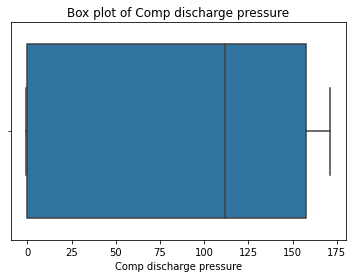

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


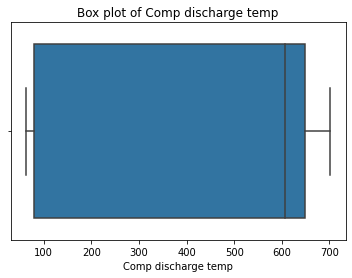

In [138]:
for col in list(turbine_data.columns)[2:]:
    outlier_boxplot(col)

In [144]:
def outliers_removal(turbine_data,col,detected_outliers,removed_outliers):
    q1=turbine_data[col].quantile(0.25)
    q3=turbine_data[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    detected_outliers[col]=((turbine_data[(turbine_data[col]< lower_bound) |(turbine_data[col]> upper_bound)]).shape[0])
    if ((detected_outliers[col]/(turbine_data.shape[0]))*100)<30:
        removed_outliers[col]=detected_outliers[col]
        turbine_data=turbine_data[(turbine_data[col] > lower_bound) & (turbine_data[col] < upper_bound)]
    return turbine_data,detected_outliers,removed_outliers

    

In [145]:

detected_outliers=removed_outliers=dict()
for col in list(turbine_data.columns)[2:]:
    turbine_data,detected_outliers,removed_outliers=outliers_removal(turbine_data,col,detected_outliers,removed_outliers)

In [146]:
detected_outliers

{'Exhaust temp': 0,
 'Comp Inlet Temp': 705,
 'Comp IGV angle': 0,
 'Comp discharge pressure': 0,
 'Comp discharge temp': 0}

In [151]:
removed_outliers

{'Exhaust temp': 0,
 'Comp Inlet Temp': 705,
 'Comp IGV angle': 0,
 'Comp discharge pressure': 0,
 'Comp discharge temp': 0}

In [153]:
turbine_data.set_index('TimeStamp',inplace=True)

In [154]:
turbine_data

,Generated watts,Exhaust temp,Comp Inlet Temp,Comp IGV angle,Comp discharge pressure,Comp discharge temp
TimeStamp,,,,,,
2020-08-24 07:00:00,56.194174,1080.458523,93.414734,66.434522,128.060547,657.479811
2020-08-24 07:15:00,70.601718,1041.563359,77.525079,80.526630,152.184579,678.769340
2020-08-24 07:30:00,72.180540,1041.942826,76.320968,83.398002,155.112297,683.747909
2020-08-24 07:45:00,72.208169,1041.736295,76.295502,83.416564,155.111015,683.659801
2020-08-24 08:00:00,75.088482,1050.141315,77.484115,83.435125,156.955242,669.689944
...,...,...,...,...,...,...
2020-11-17 22:45:00,-0.024551,243.721117,67.657511,32.003817,0.418738,224.484616
2020-11-17 23:00:00,-0.024617,228.212614,67.523798,32.004229,0.438060,215.691899
2020-11-17 23:15:00,-0.024684,214.226581,66.895684,32.004642,0.441895,208.037662
